<a href="https://colab.research.google.com/github/koegode/Accident_Severity_UK_Classification/blob/master/AAI_EXAM_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all libraries and dependencies

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Loading dependencies

import os,re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',200)

# Import dataset both train and test

# Import train dataset

In [3]:
# https://www.kaggle.com/datasets/dv1453/twitter-sentiment-analysis-analytics-vidya
# Import train dataset
# df_train = pd.read_csv("./hate_train.csv")
df_train = pd.read_csv('gdrive/My Drive/Colab Notebooks/train_E6oV3lV.csv')
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
# We need just raw tweet and lable
df_train = df_train[['tweet','label']]
df_train.head(2)

,tweet,label
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,0
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   31962 non-null  object
 1   label   31962 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [6]:
df_train.describe()

,label
count,31962.000000
mean,0.070146
std,0.255397
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
# Check the shape of train dataset
df_train.shape

(31962, 2)

In [8]:
# Check for unique value count for the labels
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

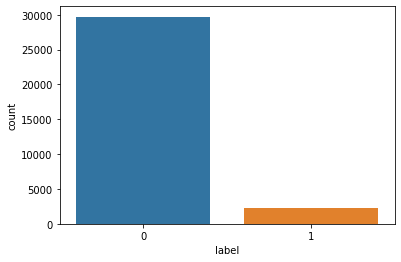

In [9]:
sns.countplot(x="label", data=df_train)

# Import test dataset

In [10]:
# https://www.kaggle.com/datasets/dv1453/twitter-sentiment-analysis-analytics-vidya
# Import test dataset
#df_test = pd.read_csv("./hate_test.csv")
df_test = pd.read_csv('gdrive/My Drive/Colab Notebooks/test_tweets_anuFYb8.csv')
df_test.head(2)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why


In [11]:
df_test.shape

(17197, 2)

**Merge Train and Test Dataset**

In [12]:
df_merged = df_train.append(df_test, ignore_index=True)
df_merged.shape

(49159, 3)

In [13]:
df_merged.tail(30)

,tweet,label,id
49129,people do anything for fucking attention nowadays ð,NaN,49130.0
49130,creative bubble got burst ð¢ looking forward to the day i never have to see my college tutor again ð,NaN,49131.0
49131,tomorrow is gonna be a big day! we are going to deliver the first box of books abroad! :) #donate #books,NaN,49132.0
49132,i am thankful for baby giggles. #thankful #positive,NaN,49133.0
49133,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,NaN,49134.0
49134,in life u will grow to learn some pple will work to fuck u over just coz ur life looks n feels better dan there's,NaN,49135.0
49135,"ði was the storm,you were the rain. together we destroyed this town and became namedð #myquotes #love",NaN,49136.0
49136,lovelgq - broken ep via #rnb #love #heabroken #hea #drake #music #studio #worldstar #billboard #mixtape,NaN,49137.0
49137,spread love not hateâ¤ï¸ðððð #prayingfororlando #loveanother #tragic #prayerâ¦,NaN,49138.0
49138,@user @user are the most racist pay ever!!!!!,NaN,49139.0


Its is observed that the test datset do not have labels. Thus the vader algorithm would be used to classify the sentiments of the merged dataset. This is to enable us use real dataset label for the test data during testing.

**VADER Algorithm Sentiment Analyzer**


In [14]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
for text in df_merged['tweet']:
    vs = analyzer.polarity_scores(text)
    print("{:-<65} {}".format(text, str(vs)))

Streaming output truncated to the last 5000 lines.
 â #aud/usd better bid, re-attempts 0.7400 on aus data   #blog #silver #gold #forex {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}
we'll be there at #hrss16 and #recex16 - will you?  #ms --------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
officially at the airpo. boarding about to sta! woohoo    #travel #backpackerliâ¦   {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.5562}
 livelypics: sometimes the best way to solve a problem is to just stop caring.   #motivation {'neg': 0.192, 'neu': 0.353, 'pos': 0.455, 'compound': 0.7717}
8yr ben   @user visiting his manor  #maidstone 2wks @user @user @user ð¯  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
i hate life and helen and all her stupid antics!! i hate her so much   {'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.9078}
@user by "occupation", some israelis mean west bank &amp; maybe gaza. palestinians mean all of that + the entire stat

In [15]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
analyzer = SentimentIntensityAnalyzer()
df_merged['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_merged['tweet']]
df_merged['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_merged['tweet']]
df_merged['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_merged['tweet']]
df_merged['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_merged['tweet']]

In [17]:
df_merged['scores'] = df_merged['tweet'].apply(lambda text: sid.polarity_scores(text))
df_merged['sentiment_score'] = df_merged['compound'].apply(lambda c: 'positive' if c >= 0 else 'negative')
df_merged['sentiment_score2'] = df_merged['compound'].apply(lambda c: 'positive' if c > 0 else ('neutral' if c == 0 else 'negative'))
df_merged['sentiment_label'] = df_merged['sentiment_score'].apply(lambda c: 0 if c == 'positive' else 1)
df_merged.head()

,tweet,label,id,compound,neg,neu,pos,scores,sentiment_score,sentiment_score2,sentiment_label
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,0.0,NaN,-0.8296,0.385,0.615,0.000,"{'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.8296}",negative,negative,1
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0.0,NaN,0.6705,0.000,0.744,0.256,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.6705}",positive,positive,0
2,bihday your majesty,0.0,NaN,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",positive,neutral,0
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,0.0,NaN,0.7249,0.000,0.663,0.337,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.7249}",positive,positive,0
4,factsguide: society now #motivation,0.0,NaN,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",positive,neutral,0


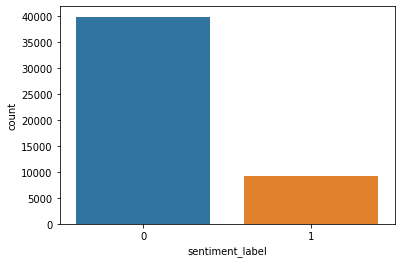

In [18]:
sns.countplot(x="sentiment_label", data=df_merged)

The inbalanced data issue still persist irrespective of using another algorithm. Therefore, I will use the sentiment labels from VADER for my analysis and modelling as well as testing the most optimal model performance on generalized dataset - test dataset.

In [19]:
df_merged.columns

Index(['tweet', 'label', 'id', 'compound', 'neg', 'neu', 'pos', 'scores',
       'sentiment_score', 'sentiment_score2', 'sentiment_label'],
      dtype='object')

In [20]:
df_merged = df_merged[['tweet','sentiment_label']]
df_merged.columns = ['tweet','label']
df_merged

,tweet,label
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,1
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0
2,bihday your majesty,0
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,0
4,factsguide: society now #motivation,0
...,...,...
49154,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,0
49155,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,0
49156,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",0
49157,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",0


In [21]:
df_train = df_merged.loc[:31961,'tweet':'label']
df_test = df_merged.loc[31962:,'tweet':'label']
df_test.tail()

,tweet,label
49154,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,0
49155,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,0
49156,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",0
49157,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",0
49158,"my song ""so glad"" free download! #shoegaze #newmusic #newsong",0


# User Define Functions

In [22]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
def tweet_preprocess(tweet):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    tweet = tweet.lower()
    # Change 't to 'not'
    tweet = re.sub(r"\'t", " not", tweet)
    # Remove @name
    tweet = re.sub(r'(@.*?)[\s]', ' ', tweet)
    # Isolate and remove punctuations except '?'
    tweet = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', tweet)
    tweet = re.sub(r'[^\w\s\?]', ' ', tweet)
    # Remove some special characters
    tweet = re.sub(r'([\;\:\|•«\n])', ' ', tweet)
    # Remove stopwords except 'not' and 'can'
    tweet = " ".join([word for word in tweet.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    return tweet


def tweet_pattern(tweet, pattern):
    r = re.findall(pattern, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
        
    return tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# regular expressions for removing special characters, such as punctuation
import re
# gensim is a library for text processing including n-gram models
import gensim
from gensim.utils import simple_preprocess
# spacy is also for text processing, here we are using the lemmatiser
import spacy
# This package draws word clouds, as a form of frequency analysis
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Cleaning Process

In [24]:
# Data Cleaning Process
# Merge the train and test datasets
df_merged = df_train.append(df_test, ignore_index=True)
df_merged.shape

(49159, 2)

In [25]:
# Clean data ...
# Remove Twitter Handles (@User)
df_merged['tweet_cleaned'] = np.vectorize(tweet_pattern)(df_merged['tweet'], "@[\w]*") 
# Remove punctuation
df_merged['tweet_cleaned'] = df_merged['tweet_cleaned'].apply(str).map(lambda x: re.sub('[,\.!?]',
'', x))
# Remove Numbers and Special Characters
df_merged['tweet_cleaned'] = df_merged['tweet_cleaned'].str.replace("[^a-zA-Z#]", " ")
# Remove shortwords
df_merged['tweet_cleaned'] = df_merged['tweet_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# Convert the titles to lowercase
df_merged['tweet_cleaned'] = df_merged['tweet_cleaned'].apply(str).map(lambda x: x.lower())



# Print out the first rows of reviews
print(df_merged['tweet_cleaned'].apply(str).head(10))

0                                                when father dysfunctional selfish drags kids into dysfunction #run
1                                     thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2                                                                                               bihday your majesty
3                                                                                        #model love take with time
4                                                                                    factsguide society #motivation
5                                huge fare talking before they leave chaos disputes when they there #allshowandnogo
6                                                                                            camping tomorrow danny
7    next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8                                                  love land #allin #cav

In [26]:

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False)) #
# deacc=True removes punctuations
#data = df_train['tweet_cleaned'].tolist()
data = df_merged['tweet_cleaned'].tolist()
data_words = list(sent_to_words(data))
print('data_words[:1]', data_words[:1])

data_words[:1] [['when', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'into', 'dysfunction', 'run']]


# Build the bigram and trigram models

In [27]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher
#threshold fewer phrases.
print('bigram',bigram)
print('bigram data',bigram[data_words])
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
print('trigram',trigram)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

bigram Phrases<256448 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
bigram data <gensim.interfaces.TransformedCorpus object at 0x7f0baba86750>
trigram Phrases<257209 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


In [28]:
# Printing off the bigrams and trigrams using this code,
for bigram in bigram_mod.phrasegrams.keys():
    print(bigram)
for trigram in trigram_mod.phrasegrams.keys():
    print(trigram) 

(b'consumer', b'price')
(b'price', b'index')
(b'from', b'previous')
(b'previous', b'blog')
(b'blog', b'silver')
(b'silver', b'gold')
(b'gold', b'forex')
(b'middle', b'school')
(b'having', b'paner')
(b'essential', b'oils')
(b'tgif', b'gamedev')
(b'gamedev', b'indiedev')
(b'indiedev', b'indiegamedev')
(b'indiegamedev', b'squad')
(b'presidential', b'candidate')
(b'passed', b'away')
(b'will', b'dominate')
(b'will', b'direct')
(b'direct', b'whatever')
(b'whatever', b'want')
(b'positive', b'affirmation')
(b'work', b'conference')
(b'conference', b'right')
(b'right', b'mindset')
(b'mindset', b'leads')
(b'leads', b'culture')
(b'culture', b'development')
(b'development', b'organizations')
(b'organizations', b'work')
(b'work', b'mindset')
(b'christina', b'grimmie')
(b'luv', b'hottweets')
(b'seeks', b'probe')
(b'probe', b'into')
(b'udtapunjab', b'leak')
(b'leak', b'points')
(b'points', b'finger')
(b'finger', b'amarinder')
(b'amarinder', b'aap')
(b'name', b'calling')
(b'mind', b'heal')
(b'body', b'

In [29]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['br']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
        
 #return [[word for word in simple_preprocess(str(doc)) if word not in ((my_stop_words) and ["movie",'film'])] for doc in texts]
    return [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]
 

In [30]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [31]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [33]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print('data_lemmatized[:1]', data_lemmatized[:1]) 

data_lemmatized[:1] [['selfish', 'drag', 'kid', 'dysfunction', 'run']]


In [34]:
data_lemmatized_df = pd.DataFrame (data_lemmatized)
data_lemmatized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       45151 non-null  object
 1   1       39369 non-null  object
 2   2       32417 non-null  object
 3   3       25088 non-null  object
 4   4       18237 non-null  object
 5   5       12369 non-null  object
 6   6       7904 non-null   object
 7   7       4527 non-null   object
 8   8       2335 non-null   object
 9   9       1078 non-null   object
 10  10      416 non-null    object
 11  11      173 non-null    object
 12  12      50 non-null     object
 13  13      10 non-null     object
 14  14      2 non-null      object
dtypes: object(15)
memory usage: 5.6+ MB


In [35]:
data_lemmatized_df.head(n = 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,selfish,drag,kid,dysfunction,run,None,None,None,None,None,None,None,None,None,None
1,thank,lyft,credit,cause,offer,wheelchair,van,disapointe,getthanke,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,model,love,time,None,None,None,None,None,None,None,None,None,None,None,None
4,factsguide,society,motivation,None,None,None,None,None,None,None,None,None,None,None,None
5,huge,fare,talk,leave,chaos,dispute,allshowandnogo,None,None,None,None,None,None,None,None
6,camping,tomorrow,None,None,None,None,None,None,None,None,None,None,None,None,None
7,school,year,year,exam,think,school,exam,hate,girl,None,None,None,None,None,None
8,love,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [36]:
def getWordCloud(hashtags):
    # Read the whole text.
    text = ' '.join(hashtags)
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud_all.pdf', dpi=500)
    plt.show()


In [37]:
# import the wordcloud library
from wordcloud import WordCloud
# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 800, height= 500,
        max_words = 300,
        stopwords = [])


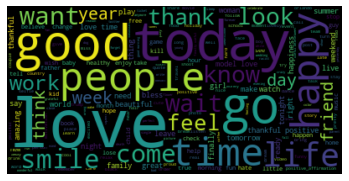

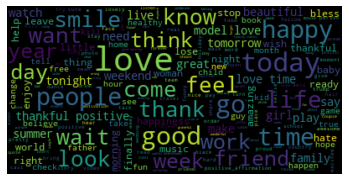

In [38]:
s = []
for l in data_lemmatized:
  t = ' '.join(l)
  s.append(t)
  
getWordCloud(s)

Positve - Non Hateful Tweets


In [39]:
df_merged['tweet_cleaned'] = s
df_merged

,tweet,label,tweet_cleaned
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,1,selfish drag kid dysfunction run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0,thank lyft credit cause offer wheelchair van disapointe getthanke
2,bihday your majesty,0,
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,0,model love time
4,factsguide: society now #motivation,0,factsguide society motivation
...,...,...,...
49154,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,0,leave brexit_blm
49155,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,0,feel formal wedding gown dress mermaid
49156,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",0,campaign today word asset radicalization
49157,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",0,happy development_organizations work_mindset


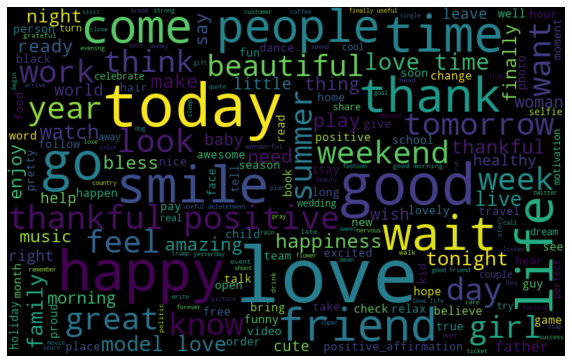

In [40]:
positive_words =' '.join([text for text in df_merged['tweet_cleaned'][df_merged['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Negative - Hateful Tweets

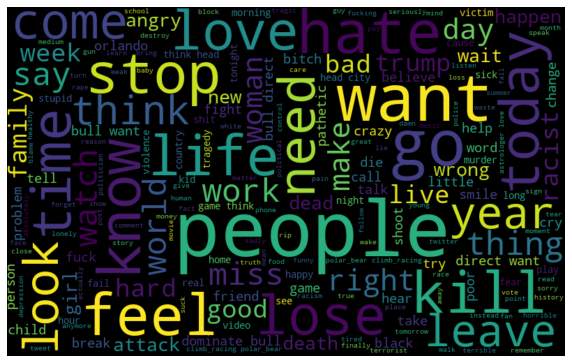

In [41]:
negative_words =' '.join([text for text in df_merged['tweet_cleaned'][df_merged['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Hashtags Impact on Tweets Sentiment

In [42]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [43]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(df_merged['tweet'][df_merged['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df_merged['tweet'][df_merged['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Positive - Non Hateful Tweets

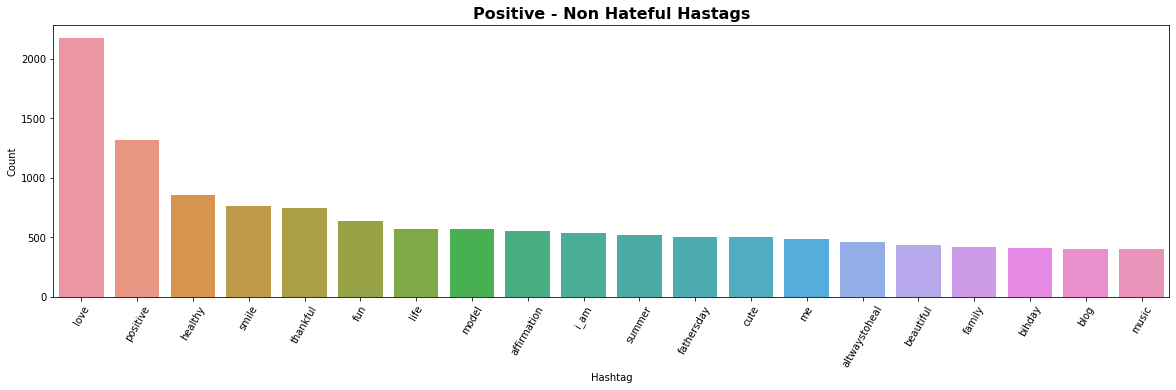

In [44]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.title('Positive - Non Hateful Hastags',fontsize=16,fontweight="bold")
ax.set(ylabel = 'Count')
plt.xticks(rotation=60)
plt.show()

Negative - Hateful Tweets

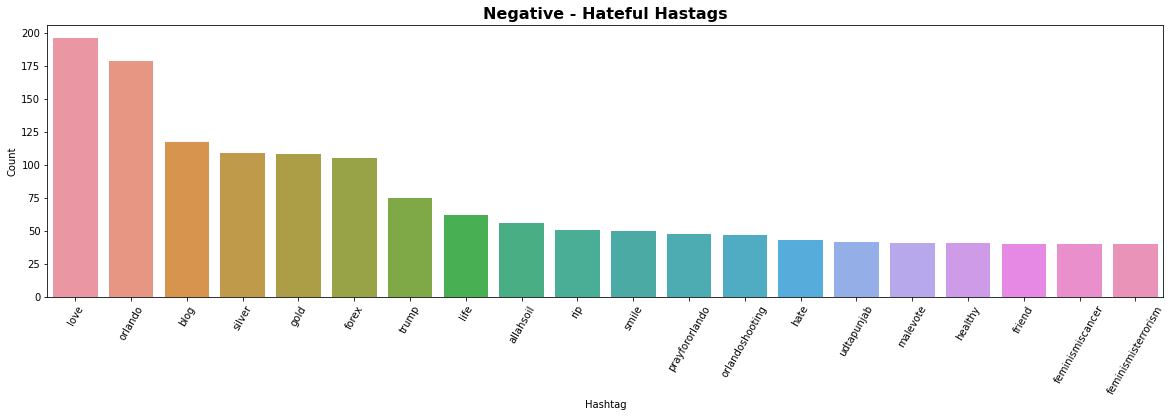

In [45]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.title('Negative - Hateful Hastags',fontsize=16,fontweight="bold")
ax.set(ylabel = 'Count')
plt.xticks(rotation=60)
plt.show()

## **Visualisation of Bigrams and Trigrams**

# https://www.kaggle.com/code/ozgeozkaya/bigram-trigram/notebook

In [46]:
from nltk import ngrams
# Function n_gram: splits the words in order to given parameter
# Parameter n: it's the "n" number for "n-gram"
def n_gram(n):                                             
    n_grams = ngrams(positive_words.split(), n)
    return n_grams

sentences = []
df_frequency = []

# Function frequency: counts the frequency of the each "n-gram" output
# Parameter grammed: it takes the function "n_gram"s return as value. Briefly, the grammed text.
def frequency(grammed):
    sentences.clear()
    df_frequency.clear()
    freq = nltk.FreqDist(grammed)
    for k, v in freq.items():
        sentences.append(k)                     # Sentences is a list, stores the grams(ignores duplicates)
        df_frequency.append(v)                  # df_frequency is a list, stores the frequency of grams

# Function create_plot: it creates a plot for given grams
# Parameter num: it's a number to send it to "n_gram" function
def create_plot(num):
    frequency(n_gram(num)) # Send "num" parameter to "n_gram func." and send the result to "frequency func."

    gram_frame = pd.DataFrame(sentences)       # gram_frame is the data frame to store grams and freq.

    gram_frame['frequencies'] = df_frequency
    if num == 2:
        gram_frame.columns = ['first', 'second', 'frequencies']
    if num == 3:
        gram_frame.columns = ['first', 'second', 'third', 'frequencies']

    gram_frame.sort_values("frequencies", axis=0, ascending=False, inplace=True, na_position='last')

    gram_frame = gram_frame.head(20)            # Only take the top 20 of gram_frame

    total = sum(df_frequency)

    gram_frame["ratio"] = gram_frame['frequencies'].div(total)   # Additional, ratio is added

    plt.rcdefaults()
    fig, ax = plt.subplots()
    if num == 2:
        grams = gram_frame["first"] + " " + gram_frame["second"]
    if num == 3:
        grams = gram_frame["first"] + " " + gram_frame["second"] + " " + gram_frame["third"]

    # Create plot
    y_pos = np.arange(len(grams))
    performance = gram_frame["frequencies"]

    ax.barh(y_pos, performance)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grams)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency')
    ax.set_title('2-3 grams')

    plt.show()
    display(gram_frame)

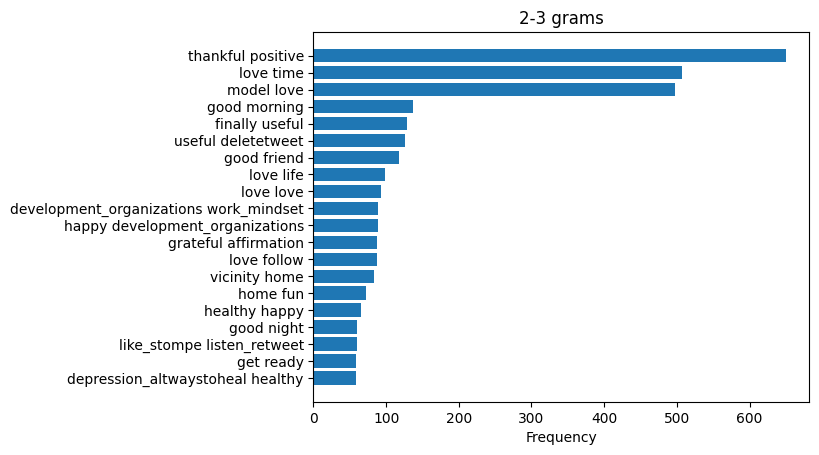

,first,second,frequencies,ratio
43,thankful,positive,650,0.004433
10,love,time,507,0.003458
9,model,love,498,0.003396
420,good,morning,137,0.000934
2772,finally,useful,129,0.000880
2773,useful,deletetweet,126,0.000859
290,good,friend,117,0.000798
1277,love,life,99,0.000675
73,love,love,93,0.000634
161,development_organizations,work_mindset,89,0.000607


In [47]:
create_plot(2)   # Create plot for bigram 

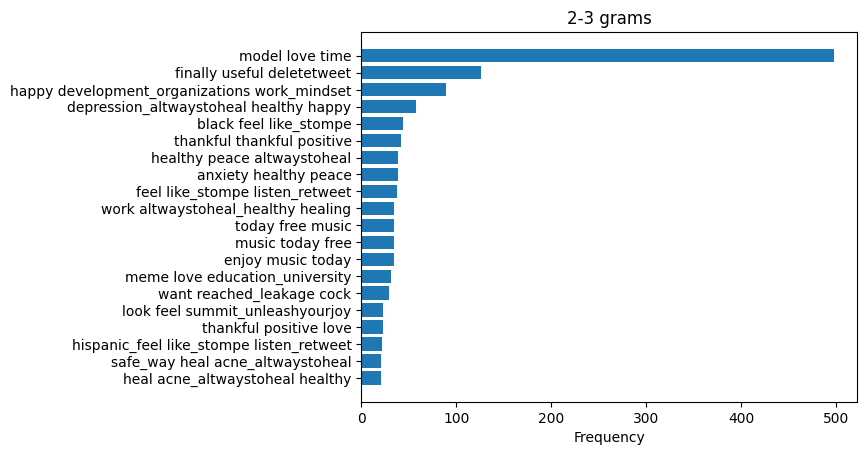

,first,second,third,frequencies,ratio
9,model,love,time,497,0.003389
2861,finally,useful,deletetweet,126,0.000859
162,happy,development_organizations,work_mindset,89,0.000607
2986,depression_altwaystoheal,healthy,happy,58,0.000396
1401,black,feel,like_stompe,44,0.000300
42,thankful,thankful,positive,42,0.000286
1261,healthy,peace,altwaystoheal,39,0.000266
1260,anxiety,healthy,peace,39,0.000266
5413,feel,like_stompe,listen_retweet,38,0.000259
5084,work,altwaystoheal_healthy,healing,34,0.000232


In [48]:
create_plot(3)   # Create plot for Trigram 

In [49]:
from nltk import ngrams
# Function n_gram: splits the words in order to given parameter
# Parameter n: it's the "n" number for "n-gram"
def n_gram(n):                                             
    n_grams = ngrams(negative_words.split(), n)
    return n_grams

sentences = []
df_frequency = []

# Function frequency: counts the frequency of the each "n-gram" output
# Parameter grammed: it takes the function "n_gram"s return as value. Briefly, the grammed text.
def frequency(grammed):
    sentences.clear()
    df_frequency.clear()
    freq = nltk.FreqDist(grammed)
    for k, v in freq.items():
        sentences.append(k)                     # Sentences is a list, stores the grams(ignores duplicates)
        df_frequency.append(v)                  # df_frequency is a list, stores the frequency of grams

# Function create_plot: it creates a plot for given grams
# Parameter num: it's a number to send it to "n_gram" function
def create2_plot(num):
    frequency(n_gram(num)) # Send "num" parameter to "n_gram func." and send the result to "frequency func."

    gram_frame = pd.DataFrame(sentences)       # gram_frame is the data frame to store grams and freq.

    gram_frame['frequencies'] = df_frequency
    if num == 2:
        gram_frame.columns = ['first', 'second', 'frequencies']
    if num == 3:
        gram_frame.columns = ['first', 'second', 'third', 'frequencies']

    gram_frame.sort_values("frequencies", axis=0, ascending=False, inplace=True, na_position='last')

    gram_frame = gram_frame.head(20)            # Only take the top 20 of gram_frame

    total = sum(df_frequency)

    gram_frame["ratio"] = gram_frame['frequencies'].div(total)   # Additional, ratio is added

    plt.rcdefaults()
    fig, ax = plt.subplots()
    if num == 2:
        grams = gram_frame["first"] + " " + gram_frame["second"]
    if num == 3:
        grams = gram_frame["first"] + " " + gram_frame["second"] + " " + gram_frame["third"]

    # Create plot
    y_pos = np.arange(len(grams))
    performance = gram_frame["frequencies"]

    ax.barh(y_pos, performance)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grams)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency')
    ax.set_title('2-3 grams')

    plt.show()
    display(gram_frame)

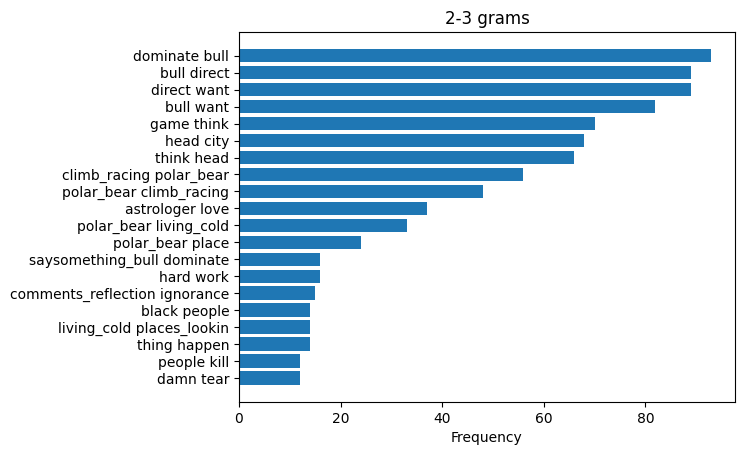

,first,second,frequencies,ratio
231,dominate,bull,93,0.002189
232,bull,direct,89,0.002095
233,direct,want,89,0.002095
40,bull,want,82,0.001930
167,game,think,70,0.001647
169,head,city,68,0.001600
168,think,head,66,0.001553
97,climb_racing,polar_bear,56,0.001318
96,polar_bear,climb_racing,48,0.001130
352,astrologer,love,37,0.000871


In [50]:
create2_plot(2)   # Create plot for bigram 

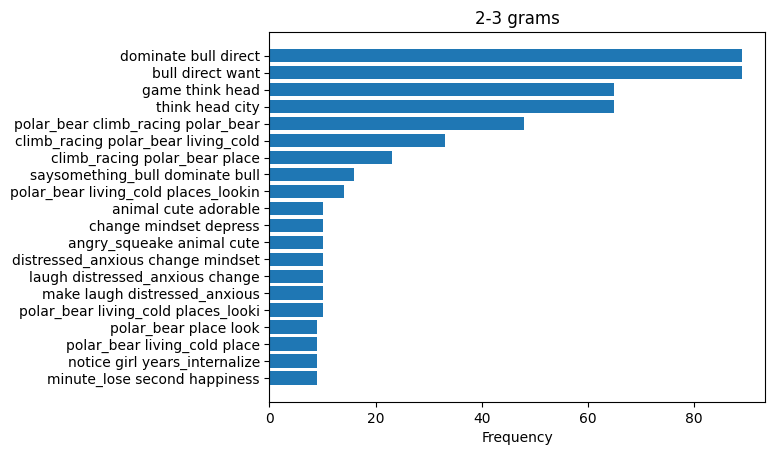

,first,second,third,frequencies,ratio
232,dominate,bull,direct,89,0.002095
233,bull,direct,want,89,0.002095
167,game,think,head,65,0.001530
168,think,head,city,65,0.001530
96,polar_bear,climb_racing,polar_bear,48,0.001130
343,climb_racing,polar_bear,living_cold,33,0.000777
97,climb_racing,polar_bear,place,23,0.000541
669,saysomething_bull,dominate,bull,16,0.000377
2721,polar_bear,living_cold,places_lookin,14,0.000329
8197,animal,cute,adorable,10,0.000235


In [51]:
create2_plot(3)   # Create plot for trigram 

**TF-IDF Features**

In [52]:
# Defining Train and Validation sets
from sklearn.model_selection import train_test_split

X = df_train['tweet'].values
y = df_train['label'].values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.1, random_state=2020)

In [53]:
X_train[0]

"bloody mary's for fathers day!!!  bring dad tomorrow!    #fathersdaydad #weloveyouâ\x80¦ "

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess tweet
X_train_preprocessed = np.array([tweet_preprocess(text) for text in X_train])
X_val_preprocessed = np.array([tweet_preprocess(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

In [55]:
X_train_preprocessed[0:10]

array(['bloody mary fathers day bring dad tomorrow fathersdaydad weloveyouâ',
       'fathers day love dad â feeling happy',
       'ð love instagood photooftheday top tags tbt cute beautiful followme followâ',
       'damn really made tear little mustread',
       'biancalflf loved first football game ð â ½ football euro2016 life holiday france fridayâ',
       'check forsale redskelton clown decorative porcelain plate fairmont 1977 user',
       'oh digressed',
       'big boy ð love instagood photooftheday top tags tbt cute beautiful followme â',
       'innerchild today smallthings lego ice cubes love peace calm relaxâ',
       'golden state rallies around draymond green mad warrior even considered truly mind blowing'],
      dtype='<U158')

**Modelling**

# Multinomial Naive Bayes algorithm 

In [56]:
# Define our multinomialNB model with and alpha of 0.1, we did try varying the alpha and at 0.2 already the accuracy is falling down 
model=MultinomialNB(alpha=0.1)

model.fit(X_train_tfidf, y_train)

labels = model.predict(X_val_tfidf)

#Check the accuracy of our MultinomialNB classifier
score = metrics.accuracy_score(y_val,labels,normalize=True)
print("accuracy: %0.3f" % score)


accuracy: 0.861


              precision    recall  f1-score   support

     label 0       0.86      0.98      0.92      2568
     label 1       0.83      0.37      0.51       629

    accuracy                           0.86      3197
   macro avg       0.85      0.68      0.72      3197
weighted avg       0.86      0.86      0.84      3197

[[2521   47]
 [ 397  232]]


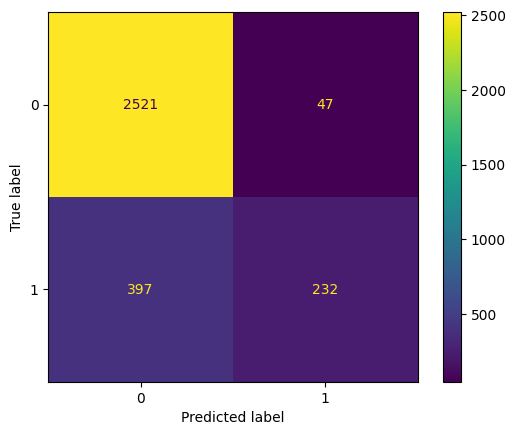

In [57]:
print(metrics.classification_report(y_val,labels,target_names=['label 0','label 1']))
print(metrics.confusion_matrix(y_val, labels))
plot_confusion_matrix(model,X_val_tfidf,y_val);

# Hyperparameter Tuning of the Alpha value of Naive Bayes

In [58]:
# model=MultinomialNB(alpha=0.06)

# model.fit(X_train_tfidf, y_train)

# labels = model.predict(X_val_tfidf)

# #Check the accuracy of our MultinomialNB classifier
# score = metrics.accuracy_score(y_val,labels,normalize=True)
# print("accuracy: %0.3f" % score)

              precision    recall  f1-score   support

     label 0       0.86      0.98      0.92      2568
     label 1       0.83      0.37      0.51       629

    accuracy                           0.86      3197
   macro avg       0.85      0.68      0.72      3197
weighted avg       0.86      0.86      0.84      3197

[[2521   47]
 [ 397  232]]


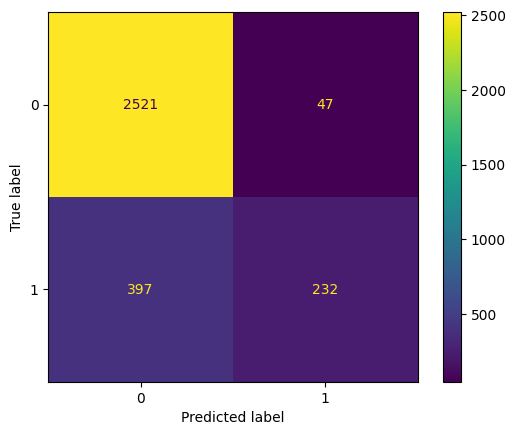

In [59]:
print(metrics.classification_report(y_val,labels,target_names=['label 0','label 1']))
print(metrics.confusion_matrix(y_val, labels))
plot_confusion_matrix(model,X_val_tfidf,y_val);

# Resampling of the dataset

In [60]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

# Separate the case of yes-sdiabetese and no-diabetese
no_ = df_train[df_train.label == 0]
yes_ = df_train[df_train.label == 1]

##Upsample the yes-diabetese cases.
df_minority_upsampled = resample(yes_, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(no_)) 

# Combine majority class with upsampled minority class
new_df = pd.concat([no_, df_minority_upsampled])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51834 entries, 1 to 18136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   51834 non-null  object
 1   label   51834 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [61]:
yes_.shape

(6045, 2)

0    25917
1    25917
Name: label, dtype: int64 

Total Number: 51834


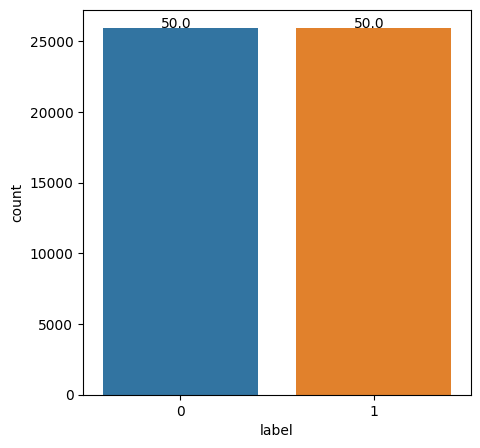

In [62]:
# Identifying label data from the whole datset and visualising label counts and display % of data as annotations

plt.figure(figsize=(5,5))

ax = sns.countplot(x="label", data=new_df)
for p in ax.patches:#displaying % as annotations
        ax.annotate(round(100*p.get_height()/len(new_df),2), (p.get_x()+0.3, p.get_height()+2))

print(new_df.label.value_counts(),"\n")
print("Total Number:",sum(new_df.label.value_counts()))

# Defining Train and Validation sets


In [63]:
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [64]:
# Defining Train and Validation sets
from sklearn.model_selection import train_test_split

X = new_df.tweet.values
y = new_df.label.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.1, random_state=2020, stratify=y)

In [65]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([tweet_preprocess(text) for text in X_train])
X_val_preprocessed = np.array([tweet_preprocess(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

CPU times: user 1min 17s, sys: 8.43 s, total: 1min 25s
Wall time: 1min 25s


In [66]:
# Define our multinomialNB model with and alpha of 0.1, we did try varying the alpha and at 0.2 already the accuracy is falling down 
model=MultinomialNB(alpha=0.06)

model.fit(X_train_tfidf, y_train)

labels = model.predict(X_val_tfidf)

#Check the accuracy of our MultinomialNB classifier
score = metrics.accuracy_score(y_val,labels,normalize=True)
print("accuracy: %0.3f" % score)


accuracy: 0.930


--------- Naive Bayes Baseline with TF-IDF Vectorizor -------
              precision    recall  f1-score   support

     label 0       0.99      0.87      0.92      2592
     label 1       0.88      0.99      0.93      2592

    accuracy                           0.93      5184
   macro avg       0.94      0.93      0.93      5184
weighted avg       0.94      0.93      0.93      5184

[[2243  349]
 [  16 2576]]


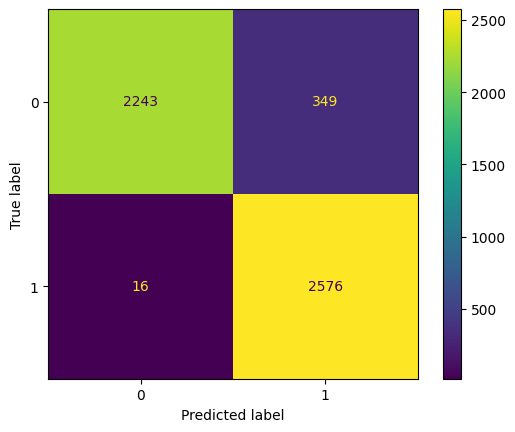

In [67]:
print('-'*9 + ' Naive Bayes Baseline with TF-IDF Vectorizor ' + '-'*7)
print(metrics.classification_report(y_val,labels,target_names=['label 0','label 1']))
print(metrics.confusion_matrix(y_val, labels))
plot_confusion_matrix(model,X_val_tfidf,y_val);

# Tensorflow Simple RNN, LSTM and GRU

In [68]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN, Activation, Dropout, Conv1D
from tensorflow.keras.layers import Embedding, Flatten, LSTM, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import spacy
from sklearn.metrics import classification_report

# Data Preprocessing

In [69]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok="<OOV>"

In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'user': 2,
 'the': 3,
 'to': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'and': 8,
 'in': 9,
 'is': 10,
 'of': 11,
 'for': 12,
 'my': 13,
 'it': 14,
 'this': 15,
 'on': 16,
 'be': 17,
 'with': 18,
 'that': 19,
 'so': 20,
 'are': 21,
 'love': 22,
 'your': 23,
 'amp': 24,
 'will': 25,
 'me': 26,
 'all': 27,
 'have': 28,
 'day': 29,
 'at': 30,
 'when': 31,
 'not': 32,
 'no': 33,
 'do': 34,
 'just': 35,
 'but': 36,
 'up': 37,
 'we': 38,
 'what': 39,
 "it's": 40,
 'people': 41,
 'was': 42,
 'happy': 43,
 'now': 44,
 "i'm": 45,
 'am': 46,
 'as': 47,
 'by': 48,
 'bull': 49,
 'like': 50,
 'from': 51,
 'they': 52,
 'about': 53,
 'how': 54,
 'out': 55,
 'life': 56,
 'â\x80¦': 57,
 'want': 58,
 'get': 59,
 'time': 60,
 'u': 61,
 'one': 62,
 'today': 63,
 'new': 64,
 'sad': 65,
 "don't": 66,
 'can': 67,
 'if': 68,
 "can't": 69,
 'he': 70,
 'who': 71,
 'our': 72,
 'why': 73,
 'his': 74,
 'more': 75,
 'an': 76,
 'has': 77,
 'go': 78,
 'orlando': 79,
 'see': 80,
 '2': 81,
 'or': 82,
 'good': 83,
 

In [71]:
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences, maxlen=max_length, 
                       truncating = trunc_type)
testing_sequences = tokenizer.texts_to_sequences(X_val)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [72]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

SimpleRNN Model

In [73]:
model_SimpleRNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_SimpleRNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5184      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [74]:
model_SimpleRNN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [75]:
num_epochs=30
history=model_SimpleRNN.fit(padded, y_train, epochs=num_epochs, validation_data = (testing_padded, y_val))

Epoch 1/30
1458/1458 [==============================] - 47s 31ms/step - loss: 0.3688 - accuracy: 0.8351 - val_loss: 0.2137 - val_accuracy: 0.9205
Epoch 2/30
1458/1458 [==============================] - 47s 32ms/step - loss: 0.1546 - accuracy: 0.9475 - val_loss: 0.1712 - val_accuracy: 0.9383
Epoch 3/30
1458/1458 [==============================] - 50s 34ms/step - loss: 0.0785 - accuracy: 0.9744 - val_loss: 0.1539 - val_accuracy: 0.9524
Epoch 4/30
1458/1458 [==============================] - 51s 35ms/step - loss: 0.0581 - accuracy: 0.9807 - val_loss: 0.1490 - val_accuracy: 0.9572
Epoch 5/30
1458/1458 [==============================] - 51s 35ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.1721 - val_accuracy: 0.9574
Epoch 6/30
1458/1458 [==============================] - 45s 31ms/step - loss: 0.0230 - accuracy: 0.9935 - val_loss: 0.1458 - val_accuracy: 0.9633
Epoch 7/30
1458/1458 [==============================] - 46s 31ms/step - loss: 0.0862 - accuracy: 0.9706 - val_loss: 0.1310 -

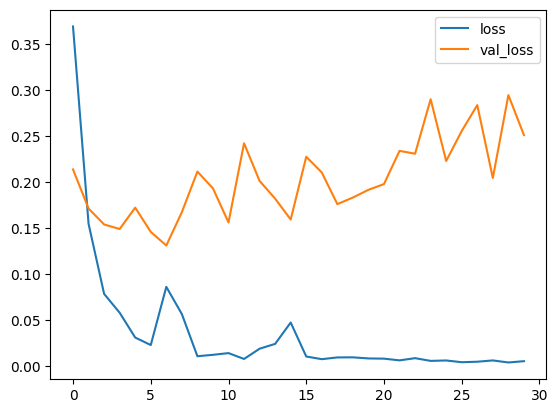

In [76]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

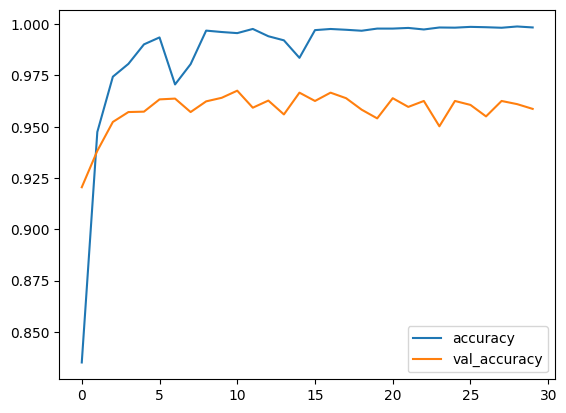

In [77]:
# plotting the accuracy and validation accuracy of the model
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

                 precision    recall  f1-score   support

Non Hate Speech       0.99      0.93      0.96      2592
    Hate Speech       0.93      0.99      0.96      2592

       accuracy                           0.96      5184
      macro avg       0.96      0.96      0.96      5184
   weighted avg       0.96      0.96      0.96      5184



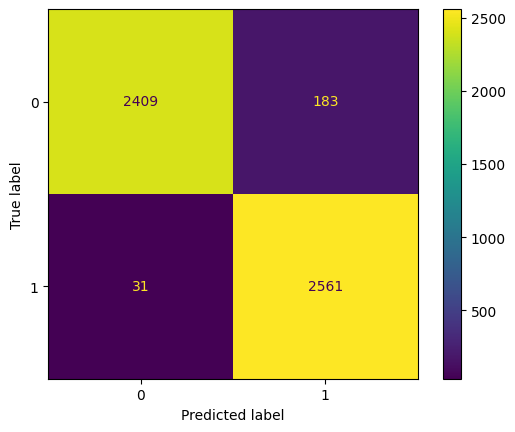

In [78]:
predictions = model_SimpleRNN.predict(testing_padded)
predictions = np.round(predictions)
print(classification_report(y_val, predictions,target_names=['Non Hate Speech','Hate Speech']))
# plot_confusion_matrix(model,y_val, predictions);

# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#y_test_preds = clf.predict(X_test)
cm = confusion_matrix(y_val, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

**GRU Model**


In [84]:
model_GRU = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_GRU.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 gru_1 (GRU)                 (None, 64)                15744     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
 dense_12 (Dense)            (None, 1)                

In [85]:
model_GRU.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
num_epochs=30
history=model_GRU.fit(padded, y_train, epochs=num_epochs, validation_data = (testing_padded, y_val))

Epoch 1/30
1458/1458 [==============================] - 121s 83ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.3236 - val_accuracy: 0.9678
Epoch 2/30
1458/1458 [==============================] - 105s 72ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.4833 - val_accuracy: 0.9655
Epoch 3/30
1458/1458 [==============================] - 104s 71ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.4377 - val_accuracy: 0.9637
Epoch 4/30
1458/1458 [==============================] - 105s 72ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.4553 - val_accuracy: 0.9668
Epoch 5/30
1458/1458 [==============================] - 104s 71ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.4293 - val_accuracy: 0.9655
Epoch 6/30
1458/1458 [==============================] - 103s 71ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.3603 - val_accuracy: 0.9674
Epoch 7/30
1239/1458 [========================>.....] - ETA: 15s - loss: 0.0010 - accuracy: 0.9997

In [1]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

NameError: ignored

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
predictions = model_GRU.predict(testing_padded)
predictions = np.round(predictions)
print(classification_report(y_val, predictions,target_names=['Non Hate Speech','Hate Speech']))
# plot_confusion_matrix(model,y_val, predictions);

# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#y_test_preds = clf.predict(X_test)
cm = confusion_matrix(y_val, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

**LSTM MODEL**

In [ ]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_LSTM.summary()

In [ ]:
model_LSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
num_epochs=30
history=model_LSTM.fit(padded, y_train, epochs=num_epochs, validation_data = (testing_padded, y_val))

In [ ]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
predictions = model_LSTM.predict(testing_padded)
predictions = np.round(predictions)
print(classification_report(y_val, predictions,target_names=['Non Hate Speech','Hate Speech']))
# plot_confusion_matrix(model,y_val, predictions);

# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#y_test_preds = clf.predict(X_test)
cm = confusion_matrix(y_val, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

Hyperparameter Tuning

Add Dropout layer

In [ ]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(3, kernel_regularizer='l1'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_LSTM.summary()

In [ ]:
model_LSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
num_epochs=30
history=model_LSTM.fit(padded, y_train, epochs=num_epochs, validation_data = (testing_padded, y_val))

In [ ]:
# Evaluating the model
# plotting the loss and validation loss of the model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
predictions = model_LSTM.predict(testing_padded)
predictions = np.round(predictions)
print(classification_report(y_val, predictions,target_names=['Non Hate Speech','Hate Speech']))
# plot_confusion_matrix(model,y_val, predictions);

# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#y_test_preds = clf.predict(X_test)
cm = confusion_matrix(y_val, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_LSTM.summary()

In [ ]:
model_LSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
num_epochs=30
history=model_LSTM.fit(padded, y_train, epochs=num_epochs, validation_data = (testing_padded, y_val))

In [ ]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
predictions = model_LSTM.predict(testing_padded)
predictions = np.round(predictions)
print(classification_report(y_val, predictions,target_names=['Non Hate Speech','Hate Speech']))
# plot_confusion_matrix(model,y_val, predictions);

# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#y_test_preds = clf.predict(X_test)
cm = confusion_matrix(y_val, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()
